In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
import matplotlib 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#making Data Frame
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

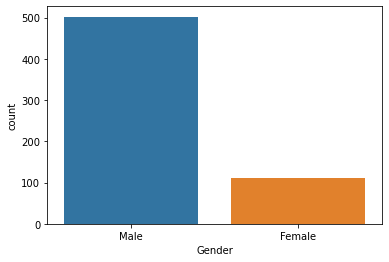

In [9]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

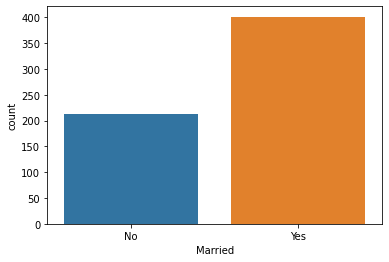

In [10]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

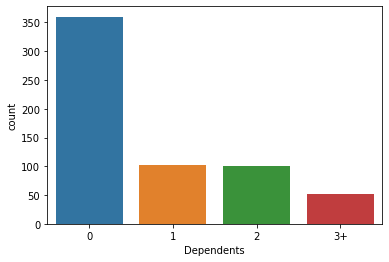

In [11]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

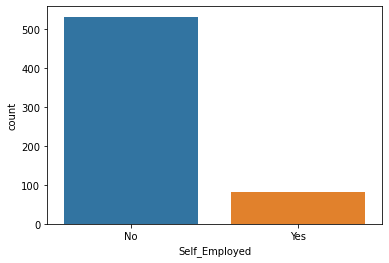

In [12]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Education', ylabel='count'>

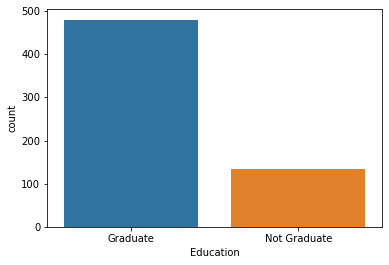

In [13]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

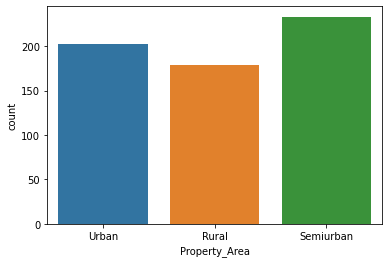

In [14]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

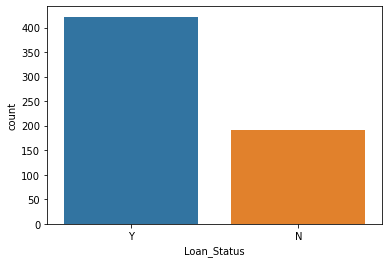

In [15]:
sns.countplot(df['Loan_Status'])

In [16]:
#new Attribute TOtal INCOME
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

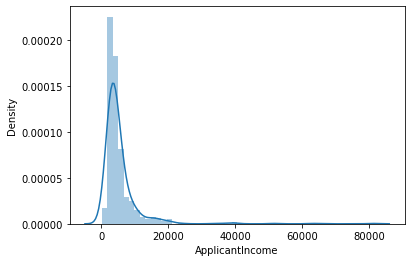

In [17]:
#numerical attribute
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

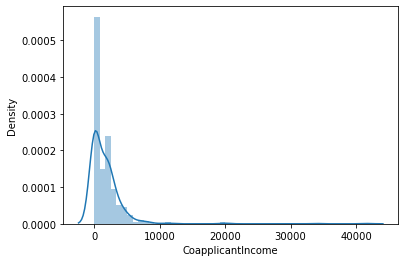

In [18]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

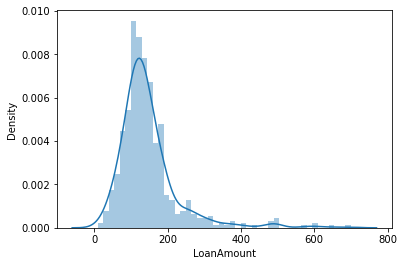

In [19]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

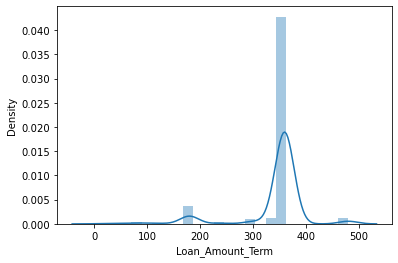

In [20]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

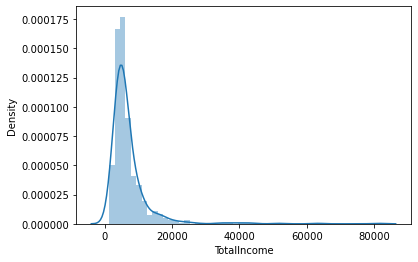

In [21]:
sns.distplot(df['TotalIncome'])

## Log Tranformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

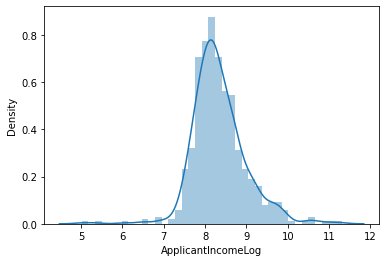

In [22]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

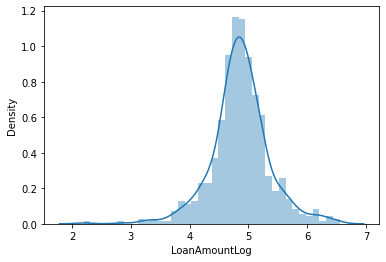

In [23]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

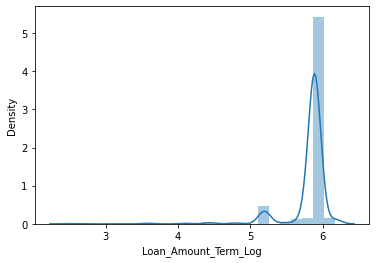

In [24]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

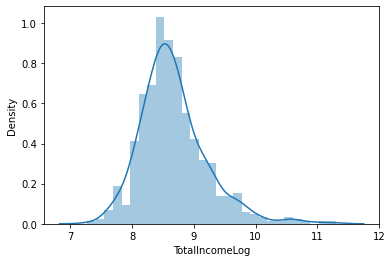

In [25]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])
sns.distplot(df['TotalIncomeLog'])

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


<AxesSubplot:>

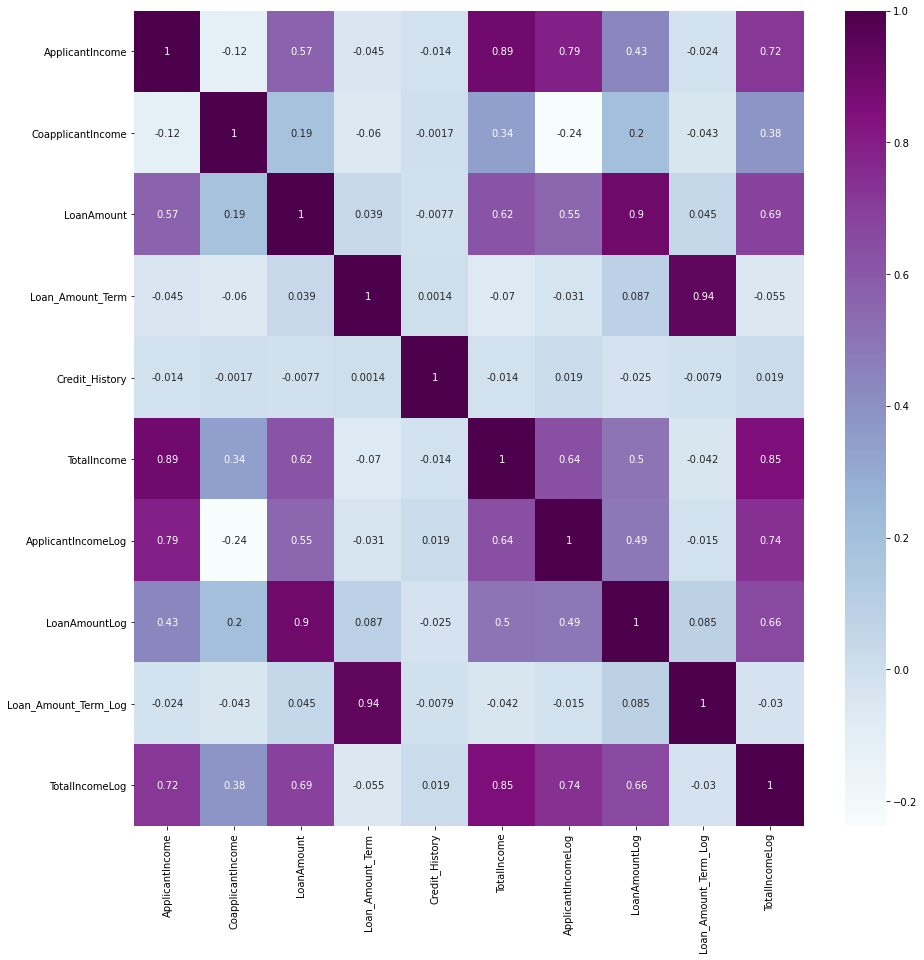

In [27]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [28]:
#drop collums
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Education']
df = df.drop(columns=cols, axis=1)
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1.0,Y,8.674026,4.986426,5.886104,8.674026
1,1.0,N,8.430109,4.852030,5.886104,8.714568
2,1.0,Y,8.006368,4.189655,5.886104,8.006368
3,1.0,Y,7.856707,4.787492,5.886104,8.505323
4,1.0,Y,8.699515,4.948760,5.886104,8.699515


## Lable Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [30]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog
0,1.0,1,8.674026,4.986426,5.886104,8.674026
1,1.0,0,8.430109,4.852030,5.886104,8.714568
2,1.0,1,8.006368,4.189655,5.886104,8.006368
3,1.0,1,7.856707,4.787492,5.886104,8.505323
4,1.0,1,8.699515,4.948760,5.886104,8.699515


## Train-Test

In [31]:
#Specifing Input And Out Attributes
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Logistic Regression

In [33]:

class LogReg(): 
    """
    Custom made Logistic Regression class
    """
    def __init__(self, lr=0.01, n_iter= 1000): 
        self.lr = lr
        self.n_iter = n_iter 
        self.params = {}
    
    def param_init(self, X_train): 
        self.X_train = X_train
        """
        Initialize parameters 
        __________________ 
        Input(s)
        X: Training data
        """
        _, n_features = self.X_train.shape # shape of training data

        # initializing coefficents to 0 
        self.params["W"] = np.zeros(n_features)
        self.params["b"] = 0
        return self.params

    def get_z(self, x, W, b): 
        """
        Calculates Linear Function
        __________________
        Input(s)
        X: Training data
        W: Weight coefficients
        b: bias coefficients
        __________________
        Output(s)
        z: a Linear function
        """
        z = np.dot(x, W) + b
        return z
        
    def sigmoid(self , z):
        """
        Logit model
        _________________
        Input(s)
        z: Linear model 
        _________________
        Output(s)
        g: Logit function applied to linear model
        """
        g = 1 / (1 + np.exp(-z))
        return g 
        

    def gradient_descent(self, x_train, y_train, params, lr, n_iter): 
        self.x_train = x_train
        self.y_train = y_train
        self.params = params
        self.lr = lr
        self.n_iter = n_iter
        
        """
        Gradient descent to minimize cost function
        __________________ 
        Input(s)
        X: Training data
        y: Labels
        params: Dictionary contatining random coefficients
        alpha: Model learning rate
        __________________
        Output(s)
        params: Dictionary containing optimized coefficients
        """

        W = self.params["W"] 
        b = self.params["b"] 
        m = x_train.shape[0]

        for _ in range(self.n_iter): 
            # prediction with random weights
            g = self.sigmoid(self.get_z(x, W, b))
            # calculate the loss
            loss = -1/m * np.sum(y * np.log(g)) + (1 - y) * np.log(1 - g)
            # partial derivative of weights 
            dW = 1/m * np.dot(x.T, (g - y))
            db = 1/m * np.sum(g - y)
            # updates to coefficients
            W -= self.lr * dW
            b -= self.lr * db 
        
        self.params["W"] = W
        self.params["b"] = b
        return self

    def train(self, x_train, y_train):
        """
        Train model with Gradient decent
        __________________ 
        Input(s)
        X: Training data
        y: Labels
        alpha: Model learning rate
        n_iter: Number of iterations 
        __________________
        Output(s)
        params: Dictionary containing optimized coefficients
        """ 
        self.params = self.param_init(x_train)
        self.gradient_descent(x_train, y_train, self.params , self.lr, self.n_iter)
        return self 

    def predict(self, x_test):
        """
        Inference 
        __________________ 
        Input(s)
        X: Unseen data
        params: Dictionary contianing optimized weights from training
        __________________
        Output(s)
        y_preds: Predictions of model
        """  
        g = self.sigmoid(np.dot(x_test, self.params["W"]) + self.params["b"])
        return g

In [54]:
#Classify functions
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
#     model.train(x_train, y_train)
    print(f"Accuracy is: {accuracy_score(y_test, y_pred)*100} " )
    # Cross Validation
#     score = cross_val_score(x, y)
#     print("Crossvalidation is", np.mean(score)*100)

In [55]:
model3 = LogReg()
model3.train(x_train, y_train)
y_pred = model3.predict(x_test)
y_pred = (y_pred > 0.5)
classify(model3, x, y)

Accuracy is: 72.72727272727273 


## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
# y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 40],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

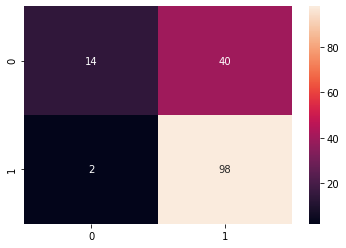

In [57]:
sns.heatmap(cm, annot=True)

In [63]:
filename = 'LRHardCode.pkl'
pickle.dump(model3 , open(filename,'wb'))